

NUID: 002747412
NAME: TANMAY SHEKHAR

ML- DATA CLEANING AND FEATURE SELECTION

ABSTRACT

The goal was to construct a realistic model to precisely predict the price of an uber ride in Boston. It is generally believed that it’s impossible to precisely predict a fair price of a cab ride as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the cab fares should be selected. Then, a model for cab ride price prediction should be established from linear regression. That should be applied to the boston cab rides dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the cab ride price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

In [1]:
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import skew, norm
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

pd.set_option('display.max_columns', None)

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy
from sklearn.impute import KNNImputer


import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

Importing all the 'important' libraries that could be used for this assignment

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/tanmayshekhar07/DataScience_TS_Project/main/cab_ridesnew.csv")
#reading the Kaggle dataset into the notebook.

In [4]:
#displaying the data
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
data.describe()

,distance,time_stamp,price,surge_multiplier
count,40000.000000,4.000000e+04,36865.000000,40000.000000
mean,2.183377,1.544028e+12,16.554903,1.015550
std,1.134038,6.872765e+08,9.325464,0.096949
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.280000,1.543440e+12,9.000000,1.000000
50%,2.140000,1.543720e+12,13.500000,1.000000
75%,2.930000,1.544810e+12,22.500000,1.000000
max,7.460000,1.545160e+12,92.000000,2.500000


In [42]:
# Q1
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("\n")
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['destination', 'source', 'id', 'product_id', 'name']


Numerical Columns :  ['distance', 'time_stamp', 'price', 'surge_multiplier', 'cab_type_Lyft', 'cab_type_Uber']


In [43]:
data.shape

(40000, 11)

In [44]:
nanValues = data.isna()
nanColumns = nanValues.any()

columnsWithNan = data.columns[nanColumns].tolist()
print(columnsWithNan)

[]


Q. Are there missing values?

Ans-> Checking NULL Values

So as we can see we have null values in the dataset that we are using and we can see that it is in the "price" column of the dataset.

Q. Which independent variables have missing data? How much?

-> None of the Independant variables have missing data as we can see above and only the dependant variable 'price' has missing values. 

In [8]:
data.isnull().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               3135
surge_multiplier       0
id                     0
product_id             0
name                   0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          40000 non-null  float64
 1   cab_type          40000 non-null  object 
 2   time_stamp        40000 non-null  float64
 3   destination       40000 non-null  object 
 4   source            40000 non-null  object 
 5   price             36865 non-null  float64
 6   surge_multiplier  40000 non-null  float64
 7   id                40000 non-null  object 
 8   product_id        40000 non-null  object 
 9   name              40000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.1+ MB


In [10]:
#Filling the missing values of the price column using median. 
data['price'].fillna(data['price'].median(), inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          40000 non-null  float64
 1   cab_type          40000 non-null  object 
 2   time_stamp        40000 non-null  float64
 3   destination       40000 non-null  object 
 4   source            40000 non-null  object 
 5   price             40000 non-null  float64
 6   surge_multiplier  40000 non-null  float64
 7   id                40000 non-null  object 
 8   product_id        40000 non-null  object 
 9   name              40000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.1+ MB


As we can see all the missing values from the price column have been imputed. 

Q. What are the distributions of the numerical values?

Text(0.5, 1.0, 'distance distribution')

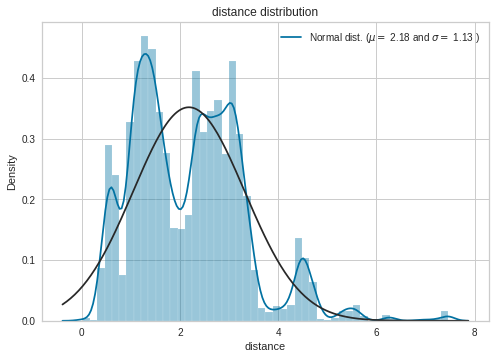

In [13]:
sns.distplot(data['distance'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['distance'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Density')
plt.title('distance distribution')

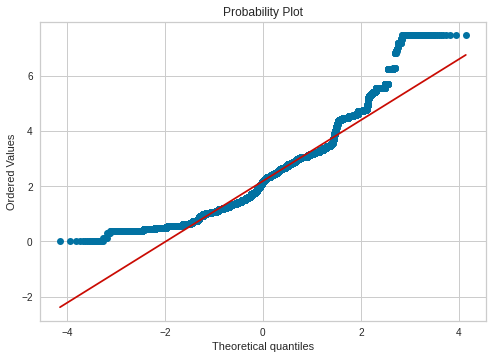

In [14]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['distance'], plot=plt)
plt.show()


Text(0.5, 1.0, 'price distribution')

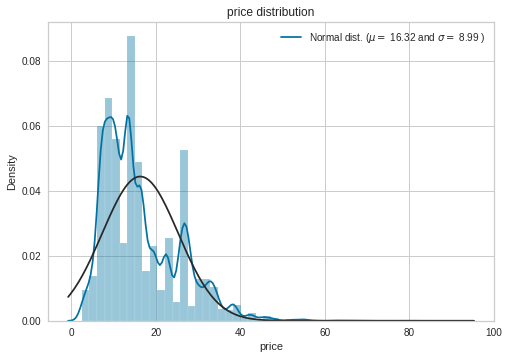

In [15]:
sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Density')
plt.title('price distribution')

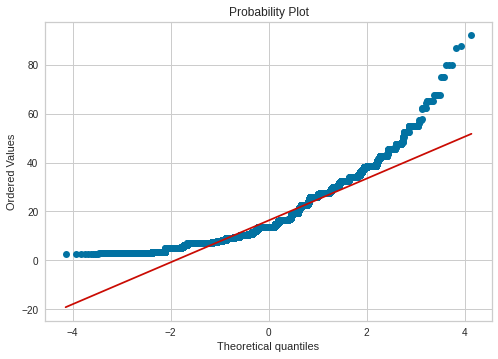

In [16]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

Text(0.5, 1.0, 'surge_multiplier distribution')

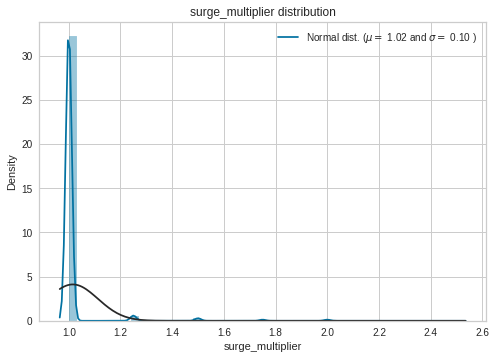

In [17]:
sns.distplot(data['surge_multiplier'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['surge_multiplier'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Density')
plt.title('surge_multiplier distribution')

Text(0.5, 1.0, 'time_stamp distribution')

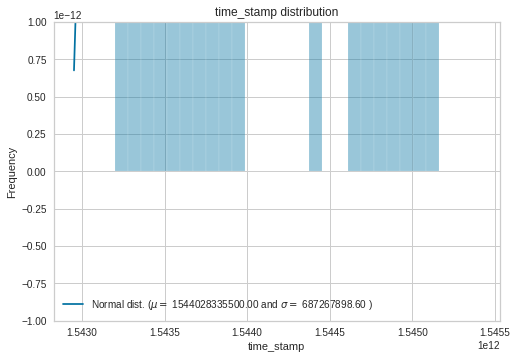

In [18]:
sns.distplot(data['time_stamp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['time_stamp'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('time_stamp distribution')

For the given dataset I plotted q-q plot and bell-curve for some of the independent variables. It is observed that most of them roughly follow normal distribution.

Other variables like 'name','product_id','cab_type, and'source-destination' are categorical variables and hence have not plotted their distribution.

#Analysing Relationship between all variables

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation. It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

This is one of the method that will tell us which of the independent variables are useful to predict a target variable. Other than correlation matrix other methods which help us to determine independent variable importance are pairplot against the target variable and calculating p-value.

Q. Which independent variables are useful to predict a target (dependent variable)?

-> This next step will roughly summarizes this question up and give us a clear Idea which variables are usefu; to predict our target which is the price.

In [27]:
# Function to One-Hot encode the dataset
def encode_oneHot(df):
    df_one_hot = pd.get_dummies(
        df,
        columns=[
            'cab_type', 
        ],
    )
    return df_one_hot

In [28]:
# One hot encoding Training and Test data
data = encode_oneHot(data)

In [29]:
data.corr()

,distance,time_stamp,price,surge_multiplier,cab_type_Lyft,cab_type_Uber
distance,1.000000,0.011633,0.325421,0.017765,0.000652,-0.000652
time_stamp,0.011633,1.000000,0.002788,0.005987,-0.006647,0.006647
price,0.325421,0.002788,1.000000,0.248818,0.107066,-0.107066
surge_multiplier,0.017765,0.005987,0.248818,1.000000,0.176103,-0.176103
cab_type_Lyft,0.000652,-0.006647,0.107066,0.176103,1.000000,-1.000000
cab_type_Uber,-0.000652,0.006647,-0.107066,-0.176103,-1.000000,1.000000


Text(0.5, 1.0, 'Variable Correlation')

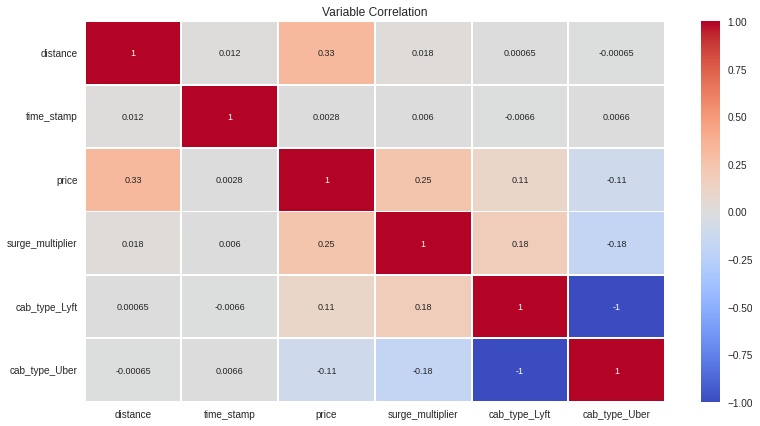

In [30]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

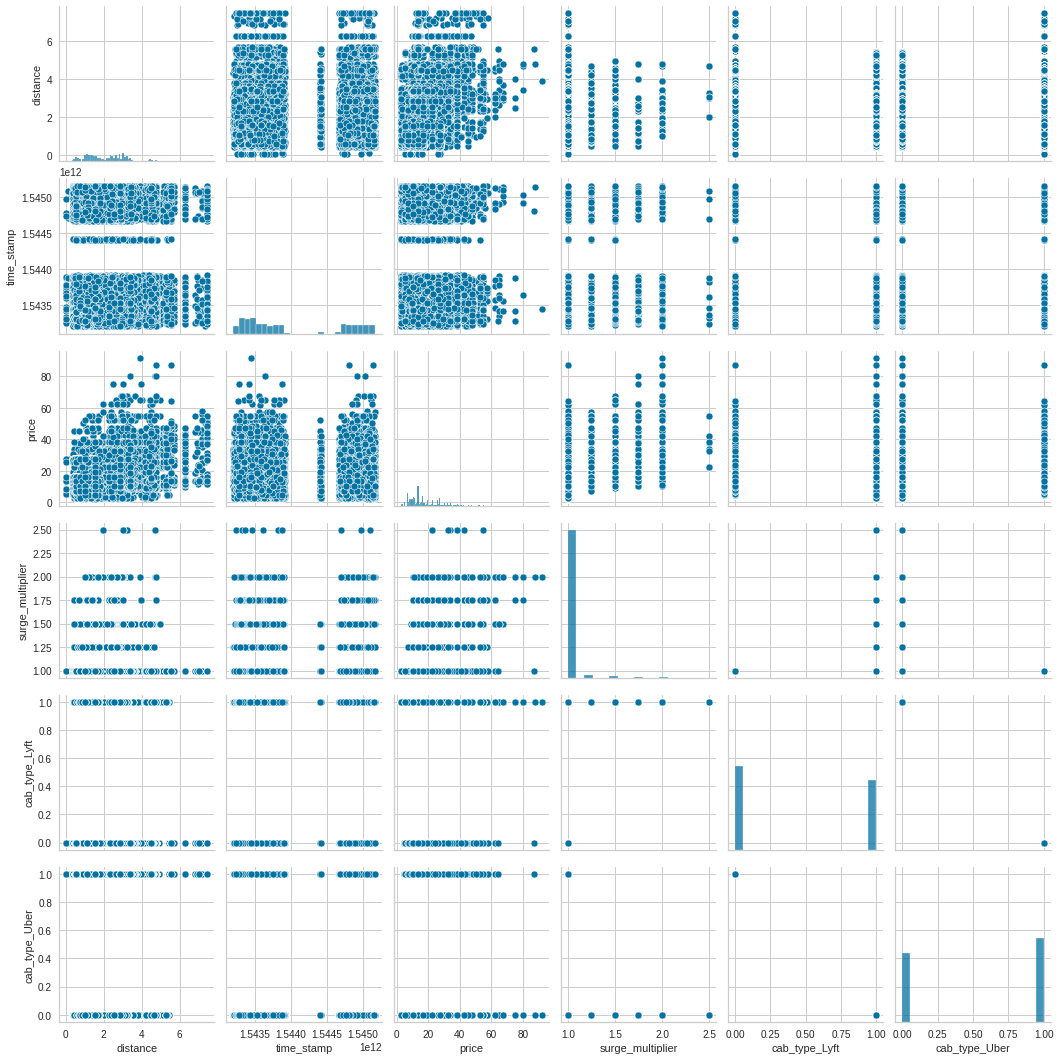

In [31]:
sns.pairplot(data)

From the correlation matrix and the plots we can determine which variables help the most in predicting the target variable. From the matrix we can determine the same by checking which variables value is close to 1. 'distance' 'surge_multiplier' and 'time_stamp' have value close to 1. When all independent variables were plotted against 'price' variable it is observed that for 'distance' and 'surge_multiplier' roughly a linear line is obtained. So it can be concluded from this plot that variables distance and surge_multiplier have linear relation with Price.

Our next step in Training the model is that we have to split the dataset into training data and test data.

To calculate the p-value and VIF we need to seperate the target variable from the independent ones. Then later we need to seperate the data into testing and training dataset.

In [32]:
X=data.drop(['price'],axis=1)
y=data['price']

In [33]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.columns

Index(['distance', 'time_stamp', 'destination', 'source', 'surge_multiplier',
       'id', 'product_id', 'name', 'cab_type_Lyft', 'cab_type_Uber'],
      dtype='object')

In [35]:
X_test.columns

Index(['distance', 'time_stamp', 'destination', 'source', 'surge_multiplier',
       'id', 'product_id', 'name', 'cab_type_Lyft', 'cab_type_Uber'],
      dtype='object')

Q. Do the training and test sets have the same data?

-> No, as demonstrated above the training and testing don’t have same data. 80% data of the dataset is for training while the remaining 20% is testing data.

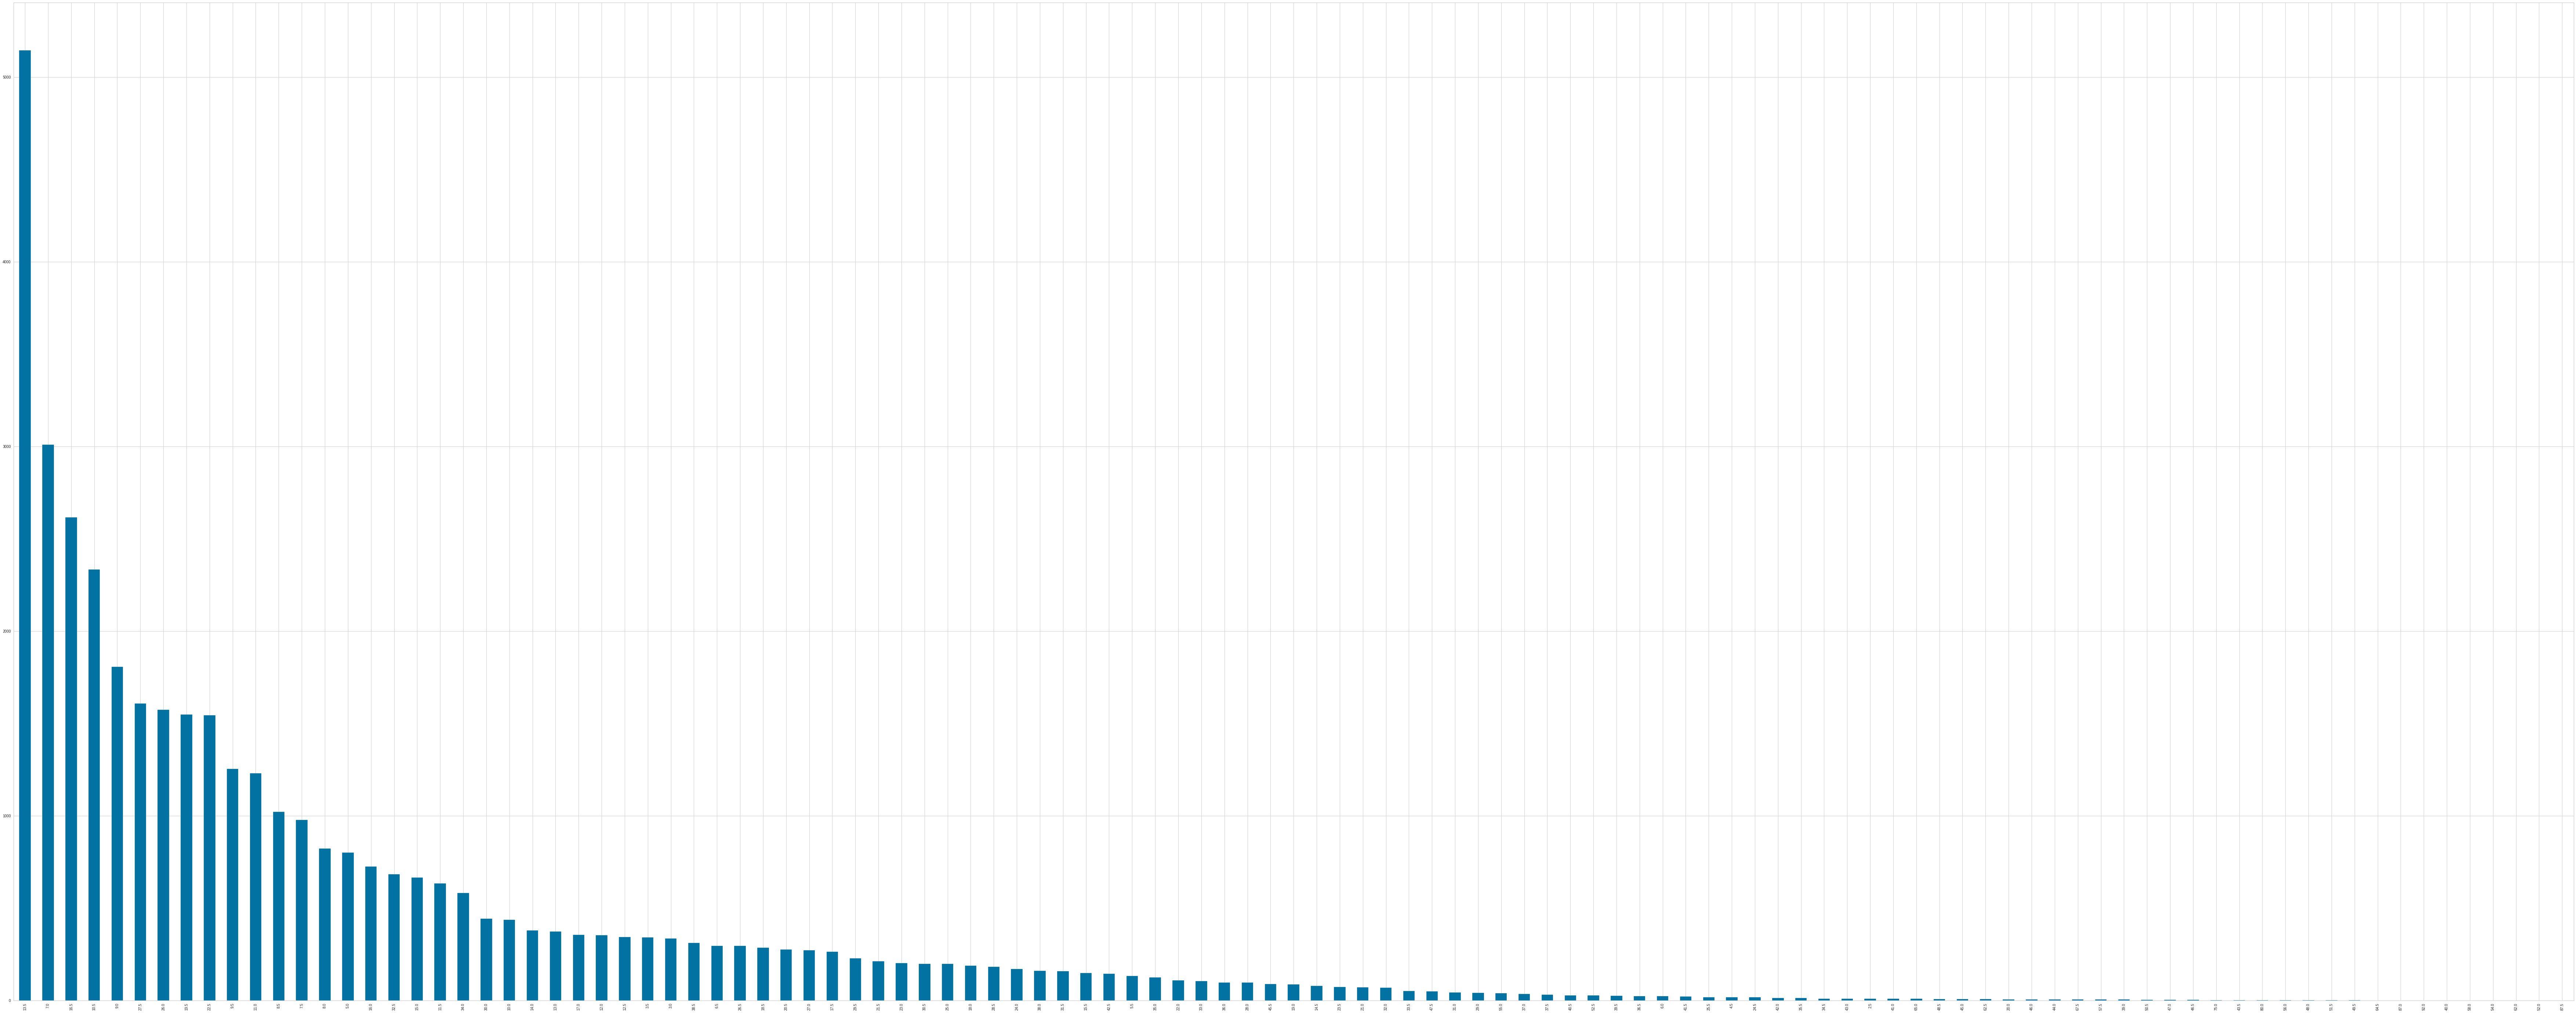

In [37]:
data['price'].value_counts().plot(kind = 'bar', figsize = (125,50))

In [38]:
data = data.drop_duplicates()

In [40]:
X = data.drop(columns = ['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


train_df = pd.DataFrame(data = X_train,columns = X_train.columns)
train_df['price'] = y_train



test_df = pd.DataFrame(data = X_test,columns = X_test.columns)
test_df['price'] = y_test
# print(y_test)
print(data.columns[:-1].values)
check_df = pd.merge(
    train_df,
    test_df,
    on=['distance', 'surge_multiplier', 'time_stamp'] , 
    how="left",
    indicator="Exist",
)

['distance' 'time_stamp' 'destination' 'source' 'price' 'surge_multiplier'
 'id' 'product_id' 'name' 'cab_type_Lyft']


In [41]:
# print(check_df.describe())
# check_df.drop(["Class_x",'Class_y'], inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(check_df["Exist"].value_counts()) 
 # This code prints the number of unique data rows in training colomns

False    19829
True     14861
Name: Exist, dtype: int64


In [55]:
rm_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39527 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          39527 non-null  float64
 1   time_stamp        39527 non-null  float64
 2   destination       39527 non-null  object 
 3   source            39527 non-null  object 
 4   price             39527 non-null  float64
 5   surge_multiplier  39527 non-null  float64
 6   id                39527 non-null  object 
 7   product_id        39527 non-null  object 
 8   name              39527 non-null  object 
 9   cab_type_Lyft     39527 non-null  uint8  
 10  cab_type_Uber     39527 non-null  uint8  
dtypes: float64(4), object(5), uint8(2)
memory usage: 3.1+ MB


# Removing Outliers by filtering data outside the inter quartile range

In [56]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 *IQR)
data.loc[filter] 

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,cab_type_Lyft,cab_type_Uber
0,0.44,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1,0
1,0.44,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1,0
2,0.44,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1,0
3,0.44,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1,0
4,0.44,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,2.84,1.544810e+12,Fenway,West End,13.5,1.0,d4ef29cb-0e43-4eae-bf2f-11e950b5da8d,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,0,1
39996,2.54,1.544720e+12,Beacon Hill,South Station,22.5,1.0,051fed5d-173d-412e-81ed-adec8b3c5d17,lyft_lux,Lux Black,1,0
39997,2.54,1.544760e+12,Beacon Hill,South Station,10.5,1.0,997db0c9-d754-4616-ab96-6f23ab951a53,lyft,Lyft,1,0
39998,2.54,1.543530e+12,Beacon Hill,South Station,32.5,1.0,bde061b8-bb1c-4124-bd17-90c99072207e,lyft_luxsuv,Lux Black XL,1,0


EXECUTING LINEAR REGRESSION WITH OUTLIERS:

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42) 
# y_train.describe()

In [49]:
data.describe()

,distance,time_stamp,price,surge_multiplier,cab_type_Lyft,cab_type_Uber
count,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.183377,1.544028e+12,16.315475,1.015550,0.453425,0.546575
std,1.134038,6.872765e+08,8.990128,0.096949,0.497832,0.497832
min,0.020000,1.543200e+12,2.500000,1.000000,0.000000,0.000000
25%,1.280000,1.543440e+12,9.500000,1.000000,0.000000,0.000000
50%,2.140000,1.543720e+12,13.500000,1.000000,0.000000,1.000000
75%,2.930000,1.544810e+12,22.500000,1.000000,1.000000,1.000000
max,7.460000,1.545160e+12,92.000000,2.500000,1.000000,1.000000


In [53]:
print('train:',X_train.shape)
print('test:',X_test.shape)
import time
import joblib

train: (30000, 11)
test: (10000, 11)


In [70]:
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import missingno
from sklearn.linear_model import LogisticRegression
from seaborn import load_dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
import seaborn as sns

In [58]:
#Removing 1% data from dataframe

df_train_per1 = data[['price']];
col_list = ['price']
for col in col_list:
    df_train_per1.loc[df_train_per1.sample(frac=0.01).index, col] = pd.np.nan

# Removing 5% data from dataframe

df_train_per5 = data[['price']];
col_list = ['price']
for col in col_list:
    df_train_per5.loc[df_train_per5.sample(frac=0.05).index, col] = pd.np.nan

# Removing 10% data from dataframe

df_train_per10 = data[['price']];
col_list = ['price']
for col in col_list:
    df_train_per10.loc[df_train_per10.sample(frac=0.10).index, col] = pd.np.nan

In [59]:
# Checking null null values after removing data from data set

print("One percent missing value: ", "\n", df_train_per1.isnull().sum())
print("")
print("Five  percent missing value: ", "\n", df_train_per5.isnull().sum())
print("")
print("Ten percent missing value: ", "\n", df_train_per10.isnull().sum())
print("")

One percent missing value:  
 price    400
dtype: int64

Five  percent missing value:  
 price    2000
dtype: int64

Ten percent missing value:  
 price    4000
dtype: int64



In [60]:
## KNN Imputation Method

# KNN Imputer for 1%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per1))
#Rounding them because these are categorical features

df_train_knn_impute_1 = pd.DataFrame(X, columns = df_train_per1.columns)

# KNN Imputer for 5%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per5))
#Rounding them because these are categorical features

df_train_knn_impute_5 = pd.DataFrame(X, columns = df_train_per5.columns)

# KNN Imputer for 10%
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_train_per10))
#Rounding them because these are categorical features

df_train_knn_impute_10 = pd.DataFrame(X, columns = df_train_per10.columns)

In [61]:
# Checking data set after imputation

df_train_knn_impute_1.isnull().sum()
df_train_knn_impute_5.isnull().sum()
df_train_knn_impute_10.isnull().sum()

price    0
dtype: int64

As you can using KNN we have imputed all the missing values from the 'price' column. 

In [62]:
# Checking null values in data

print("One percent missing data" , '\n', df_train_per1.isnull().sum())
print ("")

print("Five percent missing data" , '\n', df_train_per5.isnull().sum())
print ("")

print("Ten percent missing data" , '\n', df_train_per10.isnull().sum())
print ("")

One percent missing data 
 price    400
dtype: int64

Five percent missing data 
 price    2000
dtype: int64

Ten percent missing data 
 price    4000
dtype: int64



In [63]:
#  Using MICE Impute method

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per1 = imputer.fit_transform(df_train_per1)
print(df_train_mice_per1)

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per5 = imputer.fit_transform(df_train_per5)
print(df_train_mice_per5)

imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_mice_per10 = imputer.fit_transform(df_train_per10)
print(df_train_mice_per10)

[[ 5. ]
 [11. ]
 [ 7. ]
 ...
 [10.5]
 [32.5]
 [16.5]]
[[ 5. ]
 [11. ]
 [ 7. ]
 ...
 [10.5]
 [32.5]
 [16.5]]
[[ 5.        ]
 [11.        ]
 [ 7.        ]
 ...
 [10.5       ]
 [32.5       ]
 [16.30765278]]


In [66]:
# Storing data in dataframe
df_train_mice_per1 = pd.DataFrame(df_train_mice_per1, columns= ["price"])
df_train_mice_per5 = pd.DataFrame(df_train_mice_per1, columns= ["price"])
df_train_mice_per10 = pd.DataFrame(df_train_mice_per1, columns= ["price"])


In [67]:
# Checking data after MICE imputation

df_train_mice_per1.isnull().sum()
df_train_mice_per5.isnull().sum()
df_train_mice_per10.isnull().sum()

price    40000
dtype: int64

#Now using MEDIAN

In [68]:
# Checking null data in dataset

print("One percent missing data" , '\n', df_train_per1.isnull().sum())
print ("")

print("Five percent missing data" , '\n', df_train_per5.isnull().sum())
print ("")

print("Ten percent missing data" , '\n', df_train_per10.isnull().sum())
print ("")

One percent missing data 
 price    400
dtype: int64

Five percent missing data 
 price    2000
dtype: int64

Ten percent missing data 
 price    4000
dtype: int64



In [71]:
# Using Median Impute Method to impute the data

imputer = SimpleImputer(strategy='median')
df_train_median_per1 = imputer.fit_transform(df_train_per1)
#print(df_train_median_per1)
df_train_median_per1 = pd.DataFrame(df_train_median_per1, columns= ["price"])
print("One percent missing data" , '\n', df_train_median_per1.isnull().sum())
print ("")


imputer = SimpleImputer(strategy='median')
df_train_median_per5 = imputer.fit_transform(df_train_per5)
#print(df_train_median_per5)
df_train_median_per5 = pd.DataFrame(df_train_median_per5, columns= ["price"])
print("Five percent missing data", '\n', df_train_median_per5.isnull().sum())
print ("")

imputer = SimpleImputer(strategy='median')
df_train_median_per10 = imputer.fit_transform(df_train_per10)
#print(df_train_median_per10)
df_train_median_per10 = pd.DataFrame(df_train_median_per10, columns= ["price"])
print("Ten percent missing data" , '\n', df_train_median_per10.isnull().sum())
print ("")

One percent missing data 
 price    0
dtype: int64

Five percent missing data 
 price    0
dtype: int64

Ten percent missing data 
 price    0
dtype: int64



In [72]:
# Importing libraries to calculated errors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [73]:
df_train_new1= pd.DataFrame(data, columns= ["price"])

mse_value1=mean_squared_error(df_train_new1,df_train_median_per1)
mae_value1=mean_absolute_error(df_train_new1,df_train_median_per1)
r2_square_value1=r2_score(df_train_new1,df_train_median_per1)

mse_value5=mean_squared_error(df_train_new1,df_train_median_per5)
mae_value5=mean_absolute_error(df_train_new1,df_train_median_per5)
r2_square_value5=r2_score(df_train_new1,df_train_median_per5)

mse_value10=mean_squared_error(df_train_new1,df_train_median_per10)
mae_value10=mean_absolute_error(df_train_new1,df_train_median_per10)
r2_square_value10=r2_score(df_train_new1,df_train_median_per10)

print("Mean squared error for 1%:", mse_value1)
print("Mean absolute error for 1%:",mae_value1)
print("R squared value for 1%:",r2_square_value1)
print("")

print("Mean squared error for 1%:", mse_value5)
print("Mean absolute error for 1%:",mae_value5)
print("R squared value for 1%:",r2_square_value5)
print("")

print("Mean squared error for 1%:", mse_value10)
print("Mean absolute error for 1%:",mae_value10)
print("R squared value for 1%:",r2_square_value10)
print("")

Mean squared error for 1%: 0.8442625
Mean absolute error for 1%: 0.065075
R squared value for 1%: 0.9895538425311028

Mean squared error for 1%: 4.33505
Mean absolute error for 1%: 0.3374
R squared value for 1%: 0.9463619254253942

Mean squared error for 1%: 9.06104375
Mean absolute error for 1%: 0.6798875
R squared value for 1%: 0.8878866586576244



In [74]:
df_train_new2= pd.DataFrame(data, columns= ["price"])

mse_value1=mean_squared_error(df_train_new2,df_train_knn_impute_1)
mae_value1=mean_absolute_error(df_train_new2,df_train_knn_impute_1)
r2_square_value1=r2_score(df_train_new1,df_train_knn_impute_1)

mse_value5=mean_squared_error(df_train_new2,df_train_knn_impute_5)
mae_value5=mean_absolute_error(df_train_new2,df_train_knn_impute_5)
r2_square_value5=r2_score(df_train_new1,df_train_knn_impute_5)

mse_value10=mean_squared_error(df_train_new2,df_train_knn_impute_10)
mae_value10=mean_absolute_error(df_train_new2,df_train_knn_impute_10)
r2_square_value10=r2_score(df_train_new1,df_train_knn_impute_10)


print("Mean squared error for 1%:", mse_value1)
print("Mean absolute error for 1%:",mae_value1)
print("R squared value for 1%:",r2_square_value1)
print ("")

print("Mean squared error for 5%:", mse_value5)
print("Mean absolute error for 5%:",mae_value5)
print("R squared value for 5%:",r2_square_value5)
print ("")

print("Mean squared error for 10%:", mse_value10)
print("Mean absolute error for 10%:",mae_value10)
print("R squared value for 10%:",r2_square_value10)
print("")

Mean squared error for 1%: 0.9233625
Mean absolute error for 1%: 0.363375
R squared value for 1%: 0.9885751290909229

Mean squared error for 5%: 4.0655875
Mean absolute error for 5%: 0.63405
R squared value for 5%: 0.9496960160748815

Mean squared error for 10%: 8.3772625
Mean absolute error for 10%: 0.97705
R squared value for 10%: 0.8963471630763087

